In [1]:
import requests
import json
import pandas as pd

In [2]:

s6_df = pd.read_csv('/Users/curtislisle/Dropbox/ipython-notebooks/D3M/TERRA/terraref_r/season6date.csv')

/Users/curtislisle/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (18,32,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
s6_df.dtypes

Unnamed: 0             int64
checked                int64
result_type           object
id                   float64
citation_id          float64
site_id                int64
treatment_id         float64
sitename              object
city                  object
lat                  float64
lon                  float64
scientificname        object
commonname            object
genus                 object
species_id             int64
cultivar_id            int64
author                object
citation_year        float64
treatment             object
date                  object
time                  object
raw_date              object
month                  int64
year                   int64
dateloc              float64
trait                 object
trait_description     object
mean                 float64
units                 object
n                    float64
statname             float64
stat                 float64
notes                 object
access_level           int64
cultivar      

In [4]:
s6_df.head()['sitename']

0    MAC Field Scanner Season 6 Range 11 Column 11 W
1      MAC Field Scanner Season 6 Range 3 Column 7 E
2     MAC Field Scanner Season 6 Range 7 Column 13 E
3     MAC Field Scanner Season 6 Range 8 Column 11 E
4     MAC Field Scanner Season 6 Range 8 Column 16 E
Name: sitename, dtype: object

In [5]:
s6_df.columns

Index(['Unnamed: 0', 'checked', 'result_type', 'id', 'citation_id', 'site_id',
       'treatment_id', 'sitename', 'city', 'lat', 'lon', 'scientificname',
       'commonname', 'genus', 'species_id', 'cultivar_id', 'author',
       'citation_year', 'treatment', 'date', 'time', 'raw_date', 'month',
       'year', 'dateloc', 'trait', 'trait_description', 'mean', 'units', 'n',
       'statname', 'stat', 'notes', 'access_level', 'cultivar', 'entity',
       'method_name', 'view_url', 'edit_url', 'trans_date'],
      dtype='object')

what measurements have been included in this season.  We will build a set of all the measurement values, so we know what columns to look for in the dataset later.

In [6]:
traits = set()
for entry in s6_df['trait']:
    traits.add(entry)
print(traits)
print(len(traits))

{'stalk_diameter_fixed_height', 'canopy_cover', 'aboveground_fresh_biomass', 'panicle_count', 'surface_temperature', 'canopy_height', 'aboveground_biomass_moisture', 'leaf_angle_alpha', 'leaf_angle_beta', 'leaf_angle_mean', 'leaf_width', 'leaf_angle_chi', 'panicle_volume', 'panicle_surface_area', 'leaf_length', 'aboveground_dry_biomass'}
16


So there are 16 different traits measured at some point during the season.  We notice later down, that there is a bad record (2-17-07-05) in this dataset, so removing this bad date entry is necessary.  It could have skewed our results

In [7]:
selected = ['id','cultivar','cultivar_id','date','trans_date','sitename','trait','mean','units']
s6sel = s6_df[selected]

In [24]:
s6sel.head()

,id,cultivar,cultivar_id,date,trans_date,sitename,trait,mean,units
0,6.004923e+09,PI455307,6000000841,2018-06-20 00:00:00,2018-06-20 00:00:00,MAC Field Scanner Season 6 Range 11 Column 11 W,leaf_length,215.000000,mm
1,6.002774e+09,SP1516,6000001456,2018-07-12 12:00:00,2018-07-12 12:00:00,MAC Field Scanner Season 6 Range 3 Column 7 E,surface_temperature,32.979211,C
2,6.002774e+09,PI154750,6000000698,2018-07-12 12:00:00,2018-07-12 12:00:00,MAC Field Scanner Season 6 Range 7 Column 13 E,surface_temperature,33.243707,C
3,6.002774e+09,PI570042,6000000944,2018-07-12 12:00:00,2018-07-12 12:00:00,MAC Field Scanner Season 6 Range 8 Column 11 E,surface_temperature,34.198785,C
4,6.002774e+09,SP1516,6000001456,2018-07-12 12:00:00,2018-07-12 12:00:00,MAC Field Scanner Season 6 Range 8 Column 16 E,surface_temperature,34.090601,C


In [49]:
#check the date range to see if there are any bad datapoints
from datetime import datetime
s6sel['trans_date'] = pd.to_datetime(s6sel['trans_date'])

too_old = s6sel[s6sel['trans_date'] < datetime(2018,3,1)]
cleaned_date = s6sel[s6sel['trans_date']> datetime(2018,1,1)]

print(s6sel.shape)
print(cleaned_date.shape)
print(too_old.shape)
too_old.head()

(925563, 9)
(919165, 9)
(6398, 9)


/Users/curtislisle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,cultivar,cultivar_id,date,trans_date,sitename,trait,mean,units
26027,6.002498e+09,PI452692,6000000835,2017-07-05 12:00:00,2017-07-05 12:00:00,MAC Field Scanner Season 6 Range 7 Column 6,surface_temperature,38.069727,C
26028,6.002498e+09,PI452692,6000000835,2017-07-05 12:00:00,2017-07-05 12:00:00,MAC Field Scanner Season 6 Range 7 Column 6,surface_temperature,38.069727,C
26278,6.002498e+09,PI329550,6000000793,2017-07-05 12:00:00,2017-07-05 12:00:00,MAC Field Scanner Season 6 Range 7 Column 7,surface_temperature,37.653619,C
26279,6.002498e+09,PI329550,6000000793,2017-07-05 12:00:00,2017-07-05 12:00:00,MAC Field Scanner Season 6 Range 7 Column 7,surface_temperature,37.653619,C
26582,6.002499e+09,PI570373,6000000964,2017-07-05 12:00:00,2017-07-05 12:00:00,MAC Field Scanner Season 6 Range 7 Column 10,surface_temperature,37.725488,C


In [40]:
too_old.tail()

,id,cultivar,cultivar_id,date,trans_date,sitename,trait,mean,units
907313,6.002497e+09,PI562998,6000000889,2017-07-05 12:00:00,2017-07-05 12:00:00,MAC Field Scanner Season 6 Range 45 Column 8 E,surface_temperature,38.302393,C
907314,6.002497e+09,PI562998,6000000889,2017-07-05 12:00:00,2017-07-05 12:00:00,MAC Field Scanner Season 6 Range 45 Column 8 E,surface_temperature,38.302393,C
907396,6.002496e+09,PI585452,6000000975,2017-07-05 12:00:00,2017-07-05 12:00:00,MAC Field Scanner Season 6 Range 45 Column 9 E,surface_temperature,38.999536,C
907666,6.002500e+09,PI569244,6000000914,2017-07-05 12:00:00,2017-07-05 12:00:00,MAC Field Scanner Season 6 Range 45 Column 13 E,surface_temperature,39.249139,C
907667,6.002499e+09,PI569244,6000000914,2017-07-05 12:00:00,2017-07-05 12:00:00,MAC Field Scanner Season 6 Range 45 Column 13 E,surface_temperature,39.249139,C


In [58]:
s6sel[26027:26029]

,id,cultivar,cultivar_id,date,trans_date,sitename,trait,mean,units
26027,6.002498e+09,PI452692,6000000835,2017-07-05 12:00:00,2017-07-05 12:00:00,MAC Field Scanner Season 6 Range 7 Column 6,surface_temperature,38.069727,C
26028,6.002498e+09,PI452692,6000000835,2017-07-05 12:00:00,2017-07-05 12:00:00,MAC Field Scanner Season 6 Range 7 Column 6,surface_temperature,38.069727,C


In [59]:
traits = set()
for entry in too_old['trait']:
    traits.add(entry)
print(traits)
print(len(traits))

{'surface_temperature'}
1


In [44]:
print('old dates range from:',min(too_old['date']),' to ',max(too_old['date']))

old dates range from: 2017-07-05 12:00:00  to  2017-07-05 12:00:00


In [45]:
print('full dates range from:',min(s6sel['date']),' to ',max(s6sel['date']))

full dates range from: 2017-07-05 12:00:00  to  2018-08-22 12:00:00


In [55]:
print('cleaned dates range from:',min(cleaned_date['date']),' to ',max(cleaned_date['date']))

cleaned dates range from: 2018-04-16 12:00:00  to  2018-08-22 12:00:00


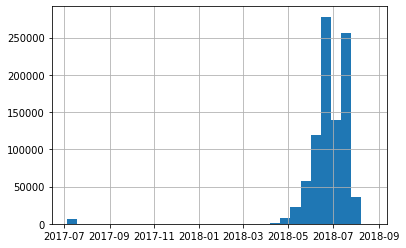

In [47]:
s6sel['date'].hist(bins=30)

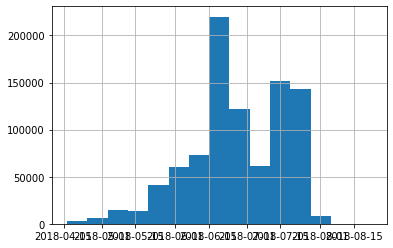

In [53]:
cleaned_date['date'].hist(bins=15)

Let's remove these records from the dataframe so the rest of the processing will be only for the correct dates. Just copying the dataframe leads to indexing problems (missing records since the index is old), so just write it out and read it back in. 

In [80]:

cleaned_date.to_csv('/Users/curtislisle/Dropbox/ipython-notebooks/D3M/TERRA/terraref_r/season6date_cleaned.csv',index=False)
ssel = pd.read_csv('/Users/curtislisle/Dropbox/ipython-notebooks/D3M/TERRA/terraref_r/season6date_cleaned.csv')
print(ssel.shape)
ssel[26025:26030]

(919165, 9)


,id,cultivar,cultivar_id,date,trans_date,sitename,trait,mean,units
26025,6.004707e+09,PI569422,6000000921,2018-06-29 12:00:00,2018-06-29 12:00:00,MAC Field Scanner Season 6 Range 20 Column 15,leaf_angle_beta,2.041665,NaN
26026,6.004707e+09,PI569422,6000000921,2018-06-29 12:00:00,2018-06-29 12:00:00,MAC Field Scanner Season 6 Range 20 Column 15,leaf_angle_chi,1.990591,NaN
26027,6.004707e+09,PI452542,6000000833,2018-06-29 12:00:00,2018-06-29 12:00:00,MAC Field Scanner Season 6 Range 21 Column 6,leaf_angle_mean,0.426731,normalized degrees
26028,6.004707e+09,PI452542,6000000833,2018-06-29 12:00:00,2018-06-29 12:00:00,MAC Field Scanner Season 6 Range 21 Column 6,leaf_angle_alpha,1.923538,NaN
26029,6.004707e+09,PI452542,6000000833,2018-06-29 12:00:00,2018-06-29 12:00:00,MAC Field Scanner Season 6 Range 21 Column 6,leaf_angle_beta,1.352096,NaN


 If all the measurements were equally distributed, doing a long to wide rollup mechanically using pandas' pivot would work.  However, all datetime entries don't contain the same attributes.   so we really need to group this dataset into major subsets:  of like measurements then try to pivot these datasets.  Or worse, have to hand convert the entries.  I elected to just write a custom algorithm to gather all the measurements together, indexed by date. 

Write a routine that pivots/rolls up the data by hand, by creating a dictionary with trans_date as its index.  Then we can add measurements one at a time...

In [83]:
shand = {}
count = 0
#for i in ssel.iloc[range(ssel.shape[0])]:
for i in range(len(ssel)):
    # if we have never seen this date before, start a new dictionary at this date

    if ssel['trans_date'][i] not in shand.keys():
        shand[ssel['trans_date'][i]] = {}

    # if we have not seen this cultivar before on this date, then add a dictionary for this cultivar.  Is there is a chance we 
    # might lose records here? 
    if ssel['cultivar_id'][i] not in shand[ssel['trans_date'][i]].keys():
        shand[ssel['trans_date'][i]][ssel['cultivar_id'][i]] = {}

    # add this feature to the dictionary for the correct cultivar on this date.  We add a dictionary entry named 
    # from the contents in the 'trait' attribute and pull the value from the 'mean' attribute.  This is the heart
    # of the long to wide format conversion.
    shand[ssel['trans_date'][i]][ssel['cultivar_id'][i]][ssel['trait'][i]] = ssel['mean'][i]

    # add the cultivar and the location (split out from the sitename text).  This will be added multiple times,
    # so represents redundant processing, but it works to place the measurements in cultivar and location
    shand[ssel['trans_date'][i]][ssel['cultivar_id'][i]]['cultivar_id'] = ssel['cultivar_id'][i]
    shand[ssel['trans_date'][i]][ssel['cultivar_id'][i]]['cultivar'] = ssel['cultivar'][i]
    shand[ssel['trans_date'][i]][ssel['cultivar_id'][i]]['season'] = int(ssel['sitename'][i].split(' ')[4])
    shand[ssel['trans_date'][i]][ssel['cultivar_id'][i]]['range'] = int(ssel['sitename'][i].split(' ')[6])
    shand[ssel['trans_date'][i]][ssel['cultivar_id'][i]]['column'] = int(ssel['sitename'][i].split(' ')[8])
    count += 1
    if ((count % 100000) == 0):
        print(count)
print('entered ',count, 'measurements')


100000
200000
300000
400000
500000
600000
700000
800000
900000
entered  919165 measurements


In [85]:
# write out a pickle save of the dictionary
import pickle

with open('/Users/curtislisle/Dropbox/ipython-notebooks/D3M/TERRA/terraref_r/s6-wide-format.pickle', 'wb') as handle:
    pickle.dump(shand, handle)

with open('/Users/curtislisle/Dropbox/ipython-notebooks/D3M/TERRA/terraref_r/s6-wide-format.pickle', 'rb') as handle:
    shand_restored = pickle.load(handle)

print (shand == shand_restored)

True


In [89]:
print('how many different datetime events:')
print(len(shand.keys()))
#print(shand.keys())
print('print ouf the wide tuple of a particular cultivar at a particular datetime:')
print(shand['2018-07-08 12:00:00'][6000000861])
print(shand['2018-07-10 12:00:00'][6000000861])

print('explore how many entries are in each datetime dict:')
print(len(shand['2018-07-08 12:00:00'][6000000861].keys()))
print(shand['2018-07-08 12:00:00'][6000000861].keys())

how many different datetime events:
167
print ouf the wide tuple of a particular cultivar at a particular datetime:
{'canopy_height': 270.0, 'cultivar_id': 6000000861, 'cultivar': 'PI526905', 'season': 6, 'range': 14, 'column': 13, 'canopy_cover': 97.62971717040001, 'surface_temperature': 33.5287719727}
{'surface_temperature': 32.7849365234, 'cultivar_id': 6000000861, 'cultivar': 'PI526905', 'season': 6, 'range': 14, 'column': 13, 'canopy_cover': 57.546862761099995}
explore how many entries are in each datetime dict:
8
dict_keys(['canopy_height', 'cultivar_id', 'cultivar', 'season', 'range', 'column', 'canopy_cover', 'surface_temperature'])


In [87]:
shand['2018-07-08 12:00:00']

{6000001456: {'leaf_angle_mean': 0.390517195128,
  'cultivar_id': 6000001456,
  'cultivar': 'SP1516',
  'season': 6,
  'range': 2,
  'column': 2,
  'leaf_angle_alpha': 3.73338495245,
  'leaf_angle_beta': 2.1367492613,
  'leaf_angle_chi': 1.99084494507,
  'canopy_height': 316.0,
  'canopy_cover': 98.8166851835,
  'surface_temperature': 34.6934143066},
 6000000819: {'leaf_angle_mean': 0.443236288162,
  'cultivar_id': 6000000819,
  'cultivar': 'PI330182',
  'season': 6,
  'range': 40,
  'column': 10,
  'leaf_angle_alpha': 2.71629232705,
  'leaf_angle_beta': 1.8370048592400003,
  'leaf_angle_chi': 1.81660475957,
  'canopy_height': 341.0,
  'canopy_cover': 99.40858878959999,
  'surface_temperature': 33.8129516602},
 6000000959: {'leaf_angle_mean': 0.409810745129,
  'cultivar_id': 6000000959,
  'cultivar': 'PI570110',
  'season': 6,
  'range': 33,
  'column': 6,
  'leaf_angle_alpha': 2.98609440441,
  'leaf_angle_beta': 1.81449275529,
  'leaf_angle_chi': 1.96662882511,
  'canopy_height': 245.

So, at this point, we have a dictionary (shand) which has keys for each different datetime a measurement was entered.  There are 167 different datetime entries.  This a smaller number fo date events than in Season 4.  This dictionary can't be scanned in datetime order, but it has accumulated all the tuples.  A single dataframe could be made from this dictionary, but a lot of the entries would be empty, since most datetime entries only contain a subset of the measurements. 


In [ ]:
# *** this is where I got to

In [12]:
histo_date = {}
for key in shand.keys():
    # how many measurements are on this datetime. accumulate in a histogram dictionary
    length = len(shand[key])
    if length not in histo_date.keys():
        histo_date[length] =  1
    else:
        histo_date[length] += 1
print(histo_date)

{317: 1, 326: 61, 306: 1, 289: 1, 279: 1, 264: 2, 251: 1, 245: 1, 226: 1, 184: 1, 165: 1, 159: 1, 207: 1, 222: 1, 223: 1, 322: 1, 324: 14, 325: 12, 108: 1, 25: 1, 60: 1, 81: 1, 64: 1, 63: 2, 51: 1, 41: 1, 40: 3, 52: 1, 18: 1, 13: 1, 9: 1, 270: 1, 8: 2, 47: 1, 262: 14, 1: 10, 299: 1, 7: 2, 2: 3, 320: 1, 321: 1, 107: 1, 45: 1, 292: 1, 314: 1, 275: 1, 313: 2, 308: 1, 257: 2, 316: 1, 218: 1, 194: 1}


from above, we can see (not very clearly) that the largest number of measurement dates (61) have 326 cultivars represented.  Next highest is 324 cultivar and 325 cultivars. 

In [88]:
# there is a bad entry in here from season 4.... 
for i in shand.keys():
    if i >= '2017-05-01' and i <= '2017-08-03':
        print(i)


Check entry for July 2nd at noon 

In [14]:
print('there are', len(shand['2018-07-02 12:00:00'][6000000962].keys()), 'keys in this observation:')
print( len(shand['2018-07-02 12:00:00']), 'different cultivars were measured')
shand['2018-07-02 12:00:00'][6000001456]

there are 12 keys in this observation:
326 different cultivars were measured


{'surface_temperature': 31.6965270996,
 'cultivar_id': 6000001456,
 'cultivar': 'SP1516',
 'season': 6,
 'range': 53,
 'column': 15,
 'leaf_angle_mean': 0.395421945051,
 'leaf_angle_alpha': 3.29308735208,
 'leaf_angle_beta': 1.9162525578599998,
 'leaf_angle_chi': 2.013876892,
 'canopy_cover': 89.1574283874,
 'canopy_height': 249.0}

delete any bad entries from the dictionary before converting to a dataframe for model fitting

In [51]:
listFull = []
dateListFull = []
for key in shand.keys():
    cultivar_keys = shand[key].keys()
    for k in cultivar_keys:
        record = shand[key][k]
        if ('canopy_height' in record) and ('leaf_angle_alpha' in record) and ('leaf_angle_beta' in record):
            record['cultivar_id'] = k
            record['date'] = key
            #print(key)
            #print(record)
            #break
            # delete columns that are missing data
            if 'panicle_count' in record:
                del record['panicle_count']
            if 'panicle_surface_area' in record:
                del record['panicle_surface_area']
            if 'panicle_volume' in record:
                del record['panicle_volume']
            if 'chlorophyll_index' in record:
                del record['chlorophyll_index']
            if 'leaf_temperature' in record:
                del record['leaf_temperature']
            if 'absorbance_730' in record:
                del record['chlorophyll_index']
            if 'surface_temperature' in record:
                del record['surface_temperature']
            if 'season' in record:
                del record['season']
            listFull.append(record)
            dateListFull.append(key)
        #break
print(len(listFull))

full_df = pd.DataFrame(listFull,index=dateListFull)
full_df.head()

8812


,canopy_cover,canopy_height,column,cultivar,cultivar_id,date,leaf_angle_alpha,leaf_angle_beta,leaf_angle_chi,leaf_angle_mean,range
2018-05-28 12:00:00,10.251607,26.0,11,PI329440,6000000568,2018-05-28 12:00:00,3.237788,2.048173,1.899235,0.409312,53
2018-05-28 12:00:00,25.782687,89.0,16,SP1516,6000001456,2018-05-28 12:00:00,1.928372,1.642006,1.642668,0.475402,50
2018-05-28 12:00:00,22.220934,36.0,9,PI585452,6000000975,2018-05-28 12:00:00,1.961725,1.744021,1.603351,0.481434,45
2018-05-28 12:00:00,16.760164,28.0,4,PI570400,6000000967,2018-05-28 12:00:00,3.779012,2.258992,1.942882,0.395571,49
2018-05-28 12:00:00,22.061168,32.0,5,PI153877,6000000697,2018-05-28 12:00:00,2.998353,1.993156,1.875853,0.406751,39


In [52]:
full_df.describe()

,canopy_cover,canopy_height,column,cultivar_id,leaf_angle_alpha,leaf_angle_beta,leaf_angle_chi,leaf_angle_mean,range
count,7408.000000,8812.000000,8812.000000,8.812000e+03,8812.000000,8812.000000,8811.000000,8811.000000,8812.000000
mean,77.783443,181.237290,8.522356,6.000001e+09,2.671277,1.852884,1.804029,0.436772,29.909896
std,23.218900,91.589162,4.089130,2.152753e+02,0.816876,0.319981,0.196398,0.045778,13.880607
min,0.870936,9.000000,1.000000,6.000000e+09,0.641057,1.056375,0.539784,0.326144,2.000000
25%,68.393073,97.000000,5.000000,6.000001e+09,2.168508,1.687148,1.713179,0.406925,18.000000
50%,86.436397,195.000000,9.000000,6.000001e+09,2.682207,1.843577,1.828741,0.429242,32.000000
75%,95.416754,253.000000,12.000000,6.000001e+09,3.160028,1.993880,1.931695,0.457612,42.000000
max,100.000000,508.000000,16.000000,6.000001e+09,8.251439,5.522708,2.390706,0.740581,54.000000


In [53]:
def returnUniqueCounts(dframe):
    return pd.DataFrame.from_records([(col, dframe[col].nunique()) for col in dframe.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])

In [54]:
returnUniqueCounts(full_df)

,Column_Name,Num_Unique
2,column,16
10,range,53
5,date,55
3,cultivar,326
4,cultivar_id,326
1,canopy_height,357
0,canopy_cover,7402
8,leaf_angle_chi,8811
9,leaf_angle_mean,8811
6,leaf_angle_alpha,8812


convert the date to a day offset into the year, so we can get an integer to pass into a model.

In [55]:
full_df.dtypes

canopy_cover        float64
canopy_height       float64
column                int64
cultivar             object
cultivar_id           int64
date                 object
leaf_angle_alpha    float64
leaf_angle_beta     float64
leaf_angle_chi      float64
leaf_angle_mean     float64
range                 int64
dtype: object

In [56]:
full_df['date'] = pd.to_datetime(full_df['date'])

In [58]:
from datetime import datetime
print(datetime.strptime('2018-05-01 12:00:00', '%Y-%m-%d %H:%M:%S'))

2018-05-01 12:00:00


In [59]:
# add an offset column that subtracts a "start date" from each of the datetimes in the samples.  This will give us an offset in days
full_df['day_offset'] = full_df['date'] - datetime.strptime('2018-05-01 12:00:00', '%Y-%m-%d %H:%M:%S')

In [60]:
# here is how a timedelta offset is converted to its component part
full_df['day_offset'][0].days

27

In [61]:
# pandas series don't like the df['column'].dt.days notation, so just convert to an int. Divide by the number of microseconds in a day
full_df['day_offset'] = full_df['day_offset'].astype('int64')/ 86400000000000
full_df.head()

,canopy_cover,canopy_height,column,cultivar,cultivar_id,date,leaf_angle_alpha,leaf_angle_beta,leaf_angle_chi,leaf_angle_mean,range,day_offset
2018-05-28 12:00:00,10.251607,26.0,11,PI329440,6000000568,2018-05-28 12:00:00,3.237788,2.048173,1.899235,0.409312,53,27.0
2018-05-28 12:00:00,25.782687,89.0,16,SP1516,6000001456,2018-05-28 12:00:00,1.928372,1.642006,1.642668,0.475402,50,27.0
2018-05-28 12:00:00,22.220934,36.0,9,PI585452,6000000975,2018-05-28 12:00:00,1.961725,1.744021,1.603351,0.481434,45,27.0
2018-05-28 12:00:00,16.760164,28.0,4,PI570400,6000000967,2018-05-28 12:00:00,3.779012,2.258992,1.942882,0.395571,49,27.0
2018-05-28 12:00:00,22.061168,32.0,5,PI153877,6000000697,2018-05-28 12:00:00,2.998353,1.993156,1.875853,0.406751,39,27.0


## Fit Models to the Season 6 extraction

In [62]:
import sklearn
import pandas as pd

In [63]:
# paste code from another notebook that uses 'cdf' as the source dataframe.  It 
# is easier to just copy to that same variable name
cdf = full_df

In [64]:
cdf.head()

,canopy_cover,canopy_height,column,cultivar,cultivar_id,date,leaf_angle_alpha,leaf_angle_beta,leaf_angle_chi,leaf_angle_mean,range,day_offset
2018-05-28 12:00:00,10.251607,26.0,11,PI329440,6000000568,2018-05-28 12:00:00,3.237788,2.048173,1.899235,0.409312,53,27.0
2018-05-28 12:00:00,25.782687,89.0,16,SP1516,6000001456,2018-05-28 12:00:00,1.928372,1.642006,1.642668,0.475402,50,27.0
2018-05-28 12:00:00,22.220934,36.0,9,PI585452,6000000975,2018-05-28 12:00:00,1.961725,1.744021,1.603351,0.481434,45,27.0
2018-05-28 12:00:00,16.760164,28.0,4,PI570400,6000000967,2018-05-28 12:00:00,3.779012,2.258992,1.942882,0.395571,49,27.0
2018-05-28 12:00:00,22.061168,32.0,5,PI153877,6000000697,2018-05-28 12:00:00,2.998353,1.993156,1.875853,0.406751,39,27.0


In [73]:
clean_df = cdf.dropna()
train_df = clean_df[['cultivar_id','day_offset','range','column','leaf_angle_alpha','leaf_angle_beta','leaf_angle_chi','leaf_angle_mean']]
target_df = clean_df['canopy_height']


In [75]:

X_train = train_df.values
y_train = target_df.values
print(X_train.shape)
print(y_train.shape)

(7406, 8)
(7406,)


dropped from 8812 to 7406, there were a lot of NAs

In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor

tree = DecisionTreeRegressor(max_depth=8).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)
#svm_mod = svm.SVR().fit(X_train, y_train)
gbr_mod = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=8, random_state=0, loss='ls').fit(X_train, y_train)

pred_tree = tree.predict(X_train)
pred_lr = linear_reg.predict(X_train)
#pred_svm = svm_mod.predict(X_train)
pred_gbr = gbr_mod.predict(X_train)


In [77]:
clean_df['decision_tree'] = pred_tree
clean_df['linearRegression'] = pred_lr
#cdf['svm'] = pred_svm
clean_df['gboost'] = pred_gbr
clean_df.head()

/Users/curtislisle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/curtislisle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/curtislisle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,canopy_cover,canopy_height,column,cultivar,cultivar_id,date,leaf_angle_alpha,leaf_angle_beta,leaf_angle_chi,leaf_angle_mean,range,day_offset,decision_tree,linearRegression,gboost
2018-05-28 12:00:00,10.251607,26.0,11,PI329440,6000000568,2018-05-28 12:00:00,3.237788,2.048173,1.899235,0.409312,53,27.0,32.222222,68.015375,27.848435
2018-05-28 12:00:00,25.782687,89.0,16,SP1516,6000001456,2018-05-28 12:00:00,1.928372,1.642006,1.642668,0.475402,50,27.0,89.000000,50.755753,87.902132
2018-05-28 12:00:00,22.220934,36.0,9,PI585452,6000000975,2018-05-28 12:00:00,1.961725,1.744021,1.603351,0.481434,45,27.0,39.382353,52.259393,38.061086
2018-05-28 12:00:00,16.760164,28.0,4,PI570400,6000000967,2018-05-28 12:00:00,3.779012,2.258992,1.942882,0.395571,49,27.0,32.222222,52.384387,31.617741
2018-05-28 12:00:00,22.061168,32.0,5,PI153877,6000000697,2018-05-28 12:00:00,2.998353,1.993156,1.875853,0.406751,39,27.0,39.382353,57.498726,35.372228


            canopy_height  decision_tree      gboost
day_offset                                          
33.0                 60.0      61.175439   60.975241
37.0                 82.0      80.814815   75.898405
63.0                219.0     209.944444  223.011499


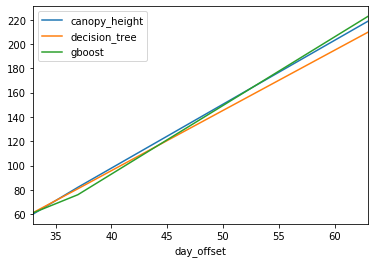

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_cultivar(fulldf,cultivar):
    df = fulldf.loc[fulldf['cultivar'] == cultivar]
    minCol = df['column'].min()
    df = df.loc[df['column']==minCol]
    #print(df.shape)
    df = df[['day_offset','canopy_height','decision_tree','gboost']]
    df = df.set_index('day_offset')
    df = df.sort_index()
    print(df)
    df.plot()

#plot_cultivar(cdf,'PI145619')
plot_cultivar(clean_df,'PI585452')

            canopy_height  decision_tree      gboost
day_offset                                          
24.0                 22.0      26.928571   24.558995
25.0                 25.0      37.117647   27.603021
26.0                 29.0      39.382353   32.009356
27.0                 32.0      39.382353   35.372228
79.0                288.0     286.242647  292.123982


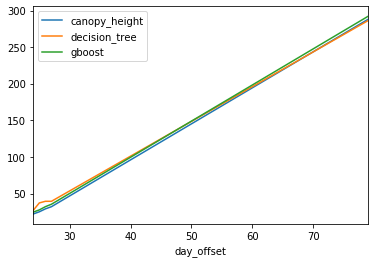

In [84]:
plot_cultivar(clean_df,'PI153877')

            canopy_height  decision_tree      gboost
day_offset                                          
25.0                 22.0      27.909091   20.875724
27.0                 28.0      32.222222   31.617741
31.0                 45.0      45.800000   46.098794
39.0                139.0     138.875000  131.292706


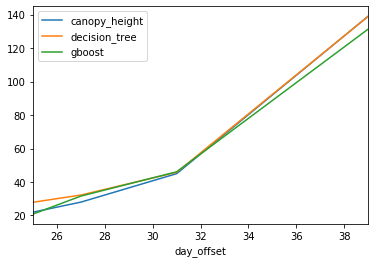

In [85]:
plot_cultivar(clean_df,'PI570400')

In [86]:
clean_df.shape

(7406, 15)

In [87]:
# calculate the percentage error between the actual and the model
clean_df['abserror_gboost'] = 100.0*abs(clean_df['canopy_height']-clean_df['gboost'])/clean_df['canopy_height']
clean_df.head()

/Users/curtislisle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,canopy_cover,canopy_height,column,cultivar,cultivar_id,date,leaf_angle_alpha,leaf_angle_beta,leaf_angle_chi,leaf_angle_mean,range,day_offset,decision_tree,linearRegression,gboost,abserror_gboost
2018-05-28 12:00:00,10.251607,26.0,11,PI329440,6000000568,2018-05-28 12:00:00,3.237788,2.048173,1.899235,0.409312,53,27.0,32.222222,68.015375,27.848435,7.109364
2018-05-28 12:00:00,25.782687,89.0,16,SP1516,6000001456,2018-05-28 12:00:00,1.928372,1.642006,1.642668,0.475402,50,27.0,89.000000,50.755753,87.902132,1.233560
2018-05-28 12:00:00,22.220934,36.0,9,PI585452,6000000975,2018-05-28 12:00:00,1.961725,1.744021,1.603351,0.481434,45,27.0,39.382353,52.259393,38.061086,5.725238
2018-05-28 12:00:00,16.760164,28.0,4,PI570400,6000000967,2018-05-28 12:00:00,3.779012,2.258992,1.942882,0.395571,49,27.0,32.222222,52.384387,31.617741,12.920502
2018-05-28 12:00:00,22.061168,32.0,5,PI153877,6000000697,2018-05-28 12:00:00,2.998353,1.993156,1.875853,0.406751,39,27.0,39.382353,57.498726,35.372228,10.538211


Try to visualize the results across the field by finding the delta at each location between the observed and the model output.  Try to use Vega or VegaLite. Checkout the native integration explained here: https://github.com/jupyterlab/jupyterlab/blob/master/examples/vega/vega-extension.ipynb

In [88]:
import numpy as np
# find a subset dataframe that contains the locations of a single cultivar in a single location in the field
grouped = clean_df.groupby(['cultivar','column','range'])   
print(grouped['abserror_gboost'].agg(np.mean))

cultivar  column  range
PI144134  11      41        5.426767
          12      13       15.697829
PI145619  2       16        4.265893
          9       29        5.405515
PI145626  13      4         4.039878
          15      47        3.201489
PI145633  5       48        3.217614
          7       10        3.425332
PI146890  4       38        4.661035
          11      15        1.996182
PI152591  3       37        7.286858
          12      15        7.735859
PI152651  6       46       12.483187
          12      17        5.368657
PI152694  13      41        1.997531
          14      5         3.433441
PI152727  11      27        8.059774
          14      37        4.381876
PI152730  7       9         3.158795
          11      47        9.081606
          14      18        4.606614
PI152733  10      43        5.026009
          14      21        3.999292
PI152771  3       28        4.240173
          12      22        8.211179
PI152816  5       5         6.348193
          7   

In [89]:
import numpy as np

plotlist = []
# find a subset dataframe that contains the locations of a single cultivar in a single location in the field
grouped = clean_df.groupby(['cultivar','column','range'])
for name,group in grouped:
    mark = {}
    mark['cultivar'] = name[0]
    mark['range'] = name[2]
    mark['column'] = name[1]
    mark['avg_error'] = group['abserror_gboost'].agg(np.mean)
    plotlist.append(mark)
    #print(mark)
print(plotlist[0])

{'cultivar': 'PI144134', 'range': 41, 'column': 11, 'avg_error': 5.426767301562468}


In [90]:
plotdf = pd.DataFrame(plotlist)
plotdf.head()

,avg_error,column,cultivar,range
0,5.426767,11,PI144134,41
1,15.697829,12,PI144134,13
2,4.265893,2,PI145619,16
3,5.405515,9,PI145619,29
4,4.039878,13,PI145626,4


This diagram is 50% overplotted, since each cultivar is planted twice in the plot.  We are only plotting one entry per field plot unit, but there are actually 2 plants in each unit.  

In [91]:
import altair as alt
alt.Chart(plotdf).mark_point().encode(
    x='column:O',
    y='range:O',
    color='avg_error',
    tooltip=[
        alt.Tooltip('cultivar:Q', title='Cultivar'),
        alt.Tooltip('avg_error:Q', title='Avg Err')
    ]
)

alt.Chart(...)

In [93]:
import altair as alt
alt.Chart(plotdf,title='Season6 - single model using quantitative cultivar').mark_rect().encode(
    x='column:O',
    y='range:O',
    color='avg_error',
    tooltip=[
        alt.Tooltip('cultivar:Q', title='Cultivar'),
        alt.Tooltip('avg_error:Q', title='Avg Err %'),
        alt.Tooltip('range:O',title='range'),
        alt.Tooltip('column:O',title='column')
    ]
)

alt.Chart(...)

In [94]:

alt.Chart(plotdf,title="Season 6: Histogram of error (in percent) of a single model").mark_bar().encode(
    alt.X("avg_error:Q", bin=True),
    y='count()',
)

alt.Chart(...)

In [95]:
X_train

array([[6.00000057e+09, 2.70000000e+01, 5.30000000e+01, ...,
        2.04817251e+00, 1.89923500e+00, 4.09312428e-01],
       [6.00000146e+09, 2.70000000e+01, 5.00000000e+01, ...,
        1.64200646e+00, 1.64266798e+00, 4.75402128e-01],
       [6.00000098e+09, 2.70000000e+01, 4.50000000e+01, ...,
        1.74402114e+00, 1.60335072e+00, 4.81433740e-01],
       ...,
       [6.00000087e+09, 1.60000000e+01, 4.60000000e+01, ...,
        1.99895118e+00, 1.99045996e+00, 3.81233386e-01],
       [6.00000146e+09, 2.10000000e+01, 5.30000000e+01, ...,
        2.08465480e+00, 1.88118896e+00, 4.15928516e-01],
       [6.00000146e+09, 1.70000000e+01, 5.30000000e+01, ...,
        1.83000870e+00, 1.69623886e+00, 4.52639253e-01]])

As an aside, we know the input of the cultivar into the model as a quantitative independent variable is a bad idea.  

### Redo the model using a categorical variable for the cultivar

In [96]:
train_df = clean_df[['cultivar','day_offset','range','column','leaf_angle_alpha','leaf_angle_beta','leaf_angle_chi','leaf_angle_mean']]
target_df = clean_df['canopy_height']
cultivar_df = clean_df['cultivar']

In [97]:

# now convert the type to categorical if it needs it
train_df['cultivar'] = pd.Categorical(train_df['cultivar'])

/Users/curtislisle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [98]:
# convert the categorical 'cultivar' variable into a set of binary columns (one hot encoding)
for col in train_df.dtypes[train_df.dtypes == 'category'].index:
    for_dummy = train_df.pop(col)
    train_df = pd.concat([train_df, pd.get_dummies(for_dummy, prefix=col)], axis=1)

In [99]:
print(train_df.shape)
train_df.head()

(7406, 333)


,day_offset,range,column,leaf_angle_alpha,leaf_angle_beta,leaf_angle_chi,leaf_angle_mean,cultivar_PI144134,cultivar_PI145619,cultivar_PI145626,...,cultivar_PI653617,cultivar_PI655972,cultivar_PI655978,cultivar_PI655983,cultivar_PI656015,cultivar_PI656026,cultivar_PI656035,cultivar_PI656065,cultivar_PI92270,cultivar_SP1516
2018-05-28 12:00:00,27.0,53,11,3.237788,2.048173,1.899235,0.409312,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-05-28 12:00:00,27.0,50,16,1.928372,1.642006,1.642668,0.475402,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2018-05-28 12:00:00,27.0,45,9,1.961725,1.744021,1.603351,0.481434,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-05-28 12:00:00,27.0,49,4,3.779012,2.258992,1.942882,0.395571,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-05-28 12:00:00,27.0,39,5,2.998353,1.993156,1.875853,0.406751,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
X_train = train_df.values
y_train = target_df.values
print(X_train.shape)
print(y_train.shape)

(7406, 333)
(7406,)


In [101]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor


tree = DecisionTreeRegressor(max_depth=8).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)
#svm_mod = svm.SVR().fit(X_train, y_train)
gbr_mod = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=8, random_state=0, loss='ls').fit(X_train, y_train)

pred_tree = tree.predict(X_train)
pred_lr = linear_reg.predict(X_train)
#pred_svm = svm_mod.predict(X_train)
pred_gbr = gbr_mod.predict(X_train)


In [102]:
train_df['decision_tree'] = pred_tree
train_df['linearRegression'] = pred_lr
#cdf['svm'] = pred_svm
train_df['gboost'] = pred_gbr
train_df['cultivar'] = cultivar_df
train_df.head()

,day_offset,range,column,leaf_angle_alpha,leaf_angle_beta,leaf_angle_chi,leaf_angle_mean,cultivar_PI144134,cultivar_PI145619,cultivar_PI145626,...,cultivar_PI656015,cultivar_PI656026,cultivar_PI656035,cultivar_PI656065,cultivar_PI92270,cultivar_SP1516,decision_tree,linearRegression,gboost,cultivar
2018-05-28 12:00:00,27.0,53,11,3.237788,2.048173,1.899235,0.409312,0,0,0,...,0,0,0,0,0,0,43.000000,57.812790,42.080355,PI329440
2018-05-28 12:00:00,27.0,50,16,1.928372,1.642006,1.642668,0.475402,0,0,0,...,0,0,0,0,0,1,89.000000,73.374495,70.013770,SP1516
2018-05-28 12:00:00,27.0,45,9,1.961725,1.744021,1.603351,0.481434,0,0,0,...,0,0,0,0,0,0,38.004386,34.735404,41.060863,PI585452
2018-05-28 12:00:00,27.0,49,4,3.779012,2.258992,1.942882,0.395571,0,0,0,...,0,0,0,0,0,0,43.000000,52.277874,40.937945,PI570400
2018-05-28 12:00:00,27.0,39,5,2.998353,1.993156,1.875853,0.406751,0,0,0,...,0,0,0,0,0,0,38.004386,51.294636,41.590063,PI153877


In [103]:
# calculate the percentage error between the actual and the model
results_df = train_df
results_df['canopy_height'] = target_df
results_df['abserror_gboost'] = 100.0*abs(results_df['canopy_height']-results_df['gboost'])/results_df['canopy_height']
results_df.head()

,day_offset,range,column,leaf_angle_alpha,leaf_angle_beta,leaf_angle_chi,leaf_angle_mean,cultivar_PI144134,cultivar_PI145619,cultivar_PI145626,...,cultivar_PI656035,cultivar_PI656065,cultivar_PI92270,cultivar_SP1516,decision_tree,linearRegression,gboost,cultivar,canopy_height,abserror_gboost
2018-05-28 12:00:00,27.0,53,11,3.237788,2.048173,1.899235,0.409312,0,0,0,...,0,0,0,0,43.000000,57.812790,42.080355,PI329440,26.0,61.847520
2018-05-28 12:00:00,27.0,50,16,1.928372,1.642006,1.642668,0.475402,0,0,0,...,0,0,0,1,89.000000,73.374495,70.013770,SP1516,89.0,21.332843
2018-05-28 12:00:00,27.0,45,9,1.961725,1.744021,1.603351,0.481434,0,0,0,...,0,0,0,0,38.004386,34.735404,41.060863,PI585452,36.0,14.057953
2018-05-28 12:00:00,27.0,49,4,3.779012,2.258992,1.942882,0.395571,0,0,0,...,0,0,0,0,43.000000,52.277874,40.937945,PI570400,28.0,46.206947
2018-05-28 12:00:00,27.0,39,5,2.998353,1.993156,1.875853,0.406751,0,0,0,...,0,0,0,0,38.004386,51.294636,41.590063,PI153877,32.0,29.968945


In [104]:
import numpy as np

plotlist = []
# find a subset dataframe that contains the locations of a single cultivar in a single location in the field
grouped = train_df.groupby(['cultivar','column','range'])
for name,group in grouped:
    mark = {}
    mark['cultivar'] = name[0]
    mark['range'] = name[2]
    mark['column'] = name[1]
    mark['avg_error'] = group['abserror_gboost'].agg(np.mean)
    plotlist.append(mark)
    #print(mark)
print(plotlist[0])

{'cultivar': 'PI144134', 'range': 41, 'column': 11, 'avg_error': 8.962693661237608}


In [105]:
plotdf = pd.DataFrame(plotlist)
plotdf.head()

,avg_error,column,cultivar,range
0,8.962694,11,PI144134,41
1,26.270846,12,PI144134,13
2,4.417180,2,PI145619,16
3,9.806560,9,PI145619,29
4,1.821131,13,PI145626,4


In [106]:
import altair as alt
alt.Chart(plotdf, title="Season6 - single model categorical cultivar").mark_rect().encode(
    x='column:O',
    y='range:O',
    color='avg_error',
    tooltip=[
        alt.Tooltip('cultivar:Q', title='Cultivar'),
        alt.Tooltip('avg_error:Q', title='Avg Err %'),
        alt.Tooltip('range:O',title='range'),
        alt.Tooltip('column:O',title='column')
    ]
)

alt.Chart(...)

In [107]:

alt.Chart(plotdf,title="season 6: Histogram of error (in percent) of a single model using categorical cultivar").mark_bar().encode(
    alt.X("avg_error:Q", bin=True),
    y='count()',
)

alt.Chart(...)

In [108]:
sorted_df = plotdf.sort_values(by=['avg_error'])
sorted_df.tail(10)

,avg_error,column,cultivar,range
246,35.068002,12,PI329644,51
329,37.221196,2,PI506030,34
192,37.361317,11,PI329440,53
463,37.824096,10,PI569419,34
289,38.498166,13,PI330796,24
126,41.655268,12,PI221548,5
586,42.563343,5,PI620072,13
217,49.503825,14,PI329518,46
38,50.142749,8,PI152965,14
154,103.871886,3,PI297155,18


            canopy_height  decision_tree     gboost
day_offset                                         
17.0                 18.0      20.589744  15.926290
19.0                 19.0      25.586466  20.134351
34.0                 75.0      98.231092  79.912336


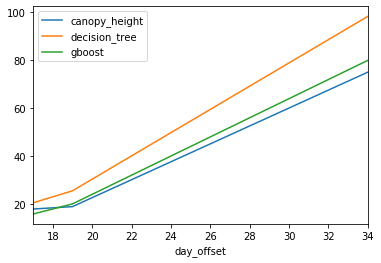

In [290]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_cultivar(fulldf,cultivar):
    df = fulldf.loc[fulldf['cultivar'] == cultivar]
    minCol = df['column'].min()
    df = df.loc[df['column']==minCol]
    #print(df.shape)
    df = df[['day_offset','canopy_height','decision_tree','gboost']]
    df = df.set_index('day_offset')
    df = df.sort_index()
    print(df)
    df.plot()

plot_cultivar(cdf,6000000960)

So it makes sense that this cultivar would be badly modeled because there are only a few datapoints.  The model doesn't have much to go on. 

In [109]:
plotdf.loc[(plotdf['column'] == 3) & (plotdf['range']==10)]

,avg_error,column,cultivar,range
325,9.557379,3,PI505722,10


In [110]:
plotdf.loc[(plotdf['column'] == 10) & (plotdf['range']==42)]

,avg_error,column,cultivar,range
366,7.770932,10,PI533998,42


So, there is only one value per square.  Cool, the previous plots are valid...

## Plot accuracies for separate models per location

In [298]:

full_df.head()

,canopy_height,column,cultivar,date,leaf_angle_alpha,leaf_angle_beta,leaf_angle_chi,leaf_angle_mean,range,season,day_offset,decision_tree,linearRegression,gboost,abserror_gboost
2017-05-13 12:00:00,15.0,2,6000000836,2017-05-13 12:00:00,2.695956,1.977380,1.756464,0.435924,43,4,12.0,20.684211,42.190178,19.914282,32.761880
2017-05-13 12:00:00,15.0,15,6000000462,2017-05-13 12:00:00,3.265980,2.018623,1.941012,0.396782,35,4,12.0,16.200000,51.816082,15.886342,5.908949
2017-05-13 12:00:00,19.0,2,6000000751,2017-05-13 12:00:00,2.159610,1.809209,1.638744,0.471944,42,4,12.0,20.684211,47.519900,22.397037,17.879142
2017-05-13 12:00:00,13.0,4,6000000916,2017-05-13 12:00:00,3.042180,2.198751,1.732985,0.444099,30,4,12.0,16.200000,44.521976,16.628871,27.914391
2017-05-15 12:00:00,17.0,2,6000000976,2017-05-15 12:00:00,2.305345,1.872028,1.665387,0.462600,45,4,14.0,20.684211,50.301563,19.387769,14.045702


In [ ]:
gbr_models = {}
predictions = {}
count = 0
grouped = full_df.groupby(['cultivar','column','range'])
for name,group in grouped:
    #print(name)
    # pick the features to use for training
    train_df = group[['cultivar','day_offset','range','column','leaf_angle_alpha','leaf_angle_beta','leaf_angle_chi','leaf_angle_mean']]
    # identify the 'target' feature to try to predict
    target_df = group['canopy_height']
    X_train = train_df.values
    y_train = target_df.values
    # train a model for this cultivar in this location and store the trained model in a dictionary
    gbr_models[name] = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=8, random_state=0, loss='ls').fit(X_train, y_train)
    gbr_pred = gbr_models[name].predict(X_train)
    count += 1
    # add the model results back into the dataframe so we can plot the actual and predicted against all the indepedent variables
    train_df['gboost'] = gbr_pred
    #put the actual target value back in the dataframe so we can plot results
    train_df['canopy_height'] = target_df
    # store the predicted results in the same dictionary organization and the trained models
    predictions[name] = train_df
print('finished generating',count,'models')

727 models were generated. This is two plants per cultivar, planted in different locations. Lets plot the whole field..

In [302]:
count = 0
for key in predictions.keys():
    print(predictions[key])
    count += 1
    if count>2:
        break

                       cultivar  day_offset  range  column  leaf_angle_alpha  \
2017-05-16 12:00:00  6000000207        15.0     39       3          3.029223   
2017-05-25 12:00:00  6000000207        24.0     39       3          2.109788   
2017-06-02 12:00:00  6000000207        32.0     39       3          2.447258   
2017-06-03 12:00:00  6000000207        33.0     39       3          3.109602   
2017-06-05 12:00:00  6000000207        35.0     39       3          2.976765   
2017-06-06 12:00:00  6000000207        36.0     39       3          2.805701   
2017-06-08 12:00:00  6000000207        38.0     39       3          3.269036   
2017-06-09 12:00:00  6000000207        39.0     39       3          2.506393   
2017-06-10 12:00:00  6000000207        40.0     39       3          3.163247   
2017-08-25 12:00:00  6000000207       116.0     39       3          1.934727   
2017-08-26 12:00:00  6000000207       117.0     39       3          1.749690   
2017-08-29 12:00:00  6000000207       12

In [316]:
predictions[(6000000207,3,39)]

,cultivar,day_offset,range,column,leaf_angle_alpha,leaf_angle_beta,leaf_angle_chi,leaf_angle_mean,gboost,canopy_height
2017-05-16 12:00:00,6000000207,15.0,39,3,3.029223,1.961442,1.870532,0.420787,22.004380,22.0
2017-05-25 12:00:00,6000000207,24.0,39,3,2.109788,1.673649,1.710402,0.461486,48.003689,48.0
2017-06-02 12:00:00,6000000207,32.0,39,3,2.447258,1.713407,1.837392,0.431054,89.002743,89.0
2017-06-03 12:00:00,6000000207,33.0,39,3,3.109602,1.913697,1.942567,0.403784,95.002346,95.0
2017-06-05 12:00:00,6000000207,35.0,39,3,2.976765,1.894488,1.910338,0.409748,113.002056,113.0
2017-06-06 12:00:00,6000000207,36.0,39,3,2.805701,1.866598,1.825539,0.435253,116.001794,116.0
2017-06-08 12:00:00,6000000207,38.0,39,3,3.269036,1.791071,2.108108,0.383240,132.001485,132.0
2017-06-09 12:00:00,6000000207,39.0,39,3,2.506393,1.684057,1.881935,0.432157,141.001287,141.0
2017-06-10 12:00:00,6000000207,40.0,39,3,3.163247,1.875412,1.972441,0.410376,150.000832,150.0
2017-08-25 12:00:00,6000000207,116.0,39,3,1.934727,1.635415,1.670653,0.458132,316.996744,317.0


In [317]:
# calculate the percentage error between the actual and the model
predictions['abserror_gboost'] = 100.0*abs(predictions['canopy_height']-predictions['gboost'])/predictions['canopy_height']
predictions.head()

KeyError: 'canopy_height'

In [318]:
import numpy as np

count = 0
plotlist = []
for key in predictions.keys():
    mark = {}
    mark['cultivar'] = key[0]
    mark['range'] = key[2]
    mark['column'] = key[1]
    df = predictions[key]
    df['abserror_gboost'] = 100.0*abs(df['canopy_height']-df['gboost'])/df['canopy_height']
    mark['avg_error'] = df['abserror_gboost'].agg(np.mean)
    plotlist.append(mark)
    count += 1
        
print(plotlist[0:5])

[{'cultivar': 6000000207, 'range': 39, 'column': 3, 'avg_error': 0.00244314741814779}, {'cultivar': 6000000207, 'range': 23, 'column': 9, 'avg_error': 0.0005775131558959814}, {'cultivar': 6000000208, 'range': 26, 'column': 14, 'avg_error': 0.0}, {'cultivar': 6000000208, 'range': 30, 'column': 15, 'avg_error': 0.0005336198421920244}, {'cultivar': 6000000209, 'range': 39, 'column': 4, 'avg_error': 0.002820469437681125}]


/Users/curtislisle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [319]:
plotdf = pd.DataFrame(plotlist)
plotdf.head()
len(plotdf)

727

In [321]:
import altair as alt
alt.Chart(plotdf, title="Season4 - model per location categorical cultivar").mark_rect().encode(
    x='column:O',
    y='range:O',
    color='avg_error',
    tooltip=[
        alt.Tooltip('cultivar:Q', title='Cultivar'),
        alt.Tooltip('avg_error:Q', title='Avg Err %'),
        alt.Tooltip('range:O',title='range'),
        alt.Tooltip('column:O',title='column')
    ]
)

alt.Chart(...)

In [322]:
plotdf.head()

,avg_error,column,cultivar,range
0,0.002443,3,6000000207,39
1,0.000578,9,6000000207,23
2,0.000000,14,6000000208,26
3,0.000534,15,6000000208,30
4,0.002820,4,6000000209,39


In [324]:

alt.Chart(plotdf,title="Histogram of error (%) of a model per location using categorical cultivar").mark_bar().encode(
    alt.X("avg_error:Q", bin=True),
    y='count()',
)

alt.Chart(...)